### Circuit Diagram Qubit state after creation

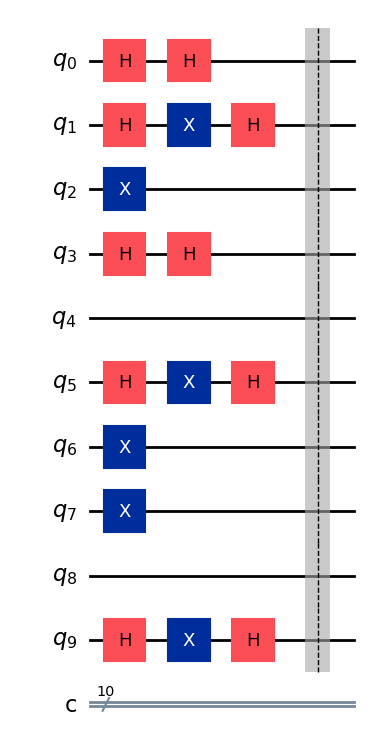

### Circuit Diagram with Eavesdropping

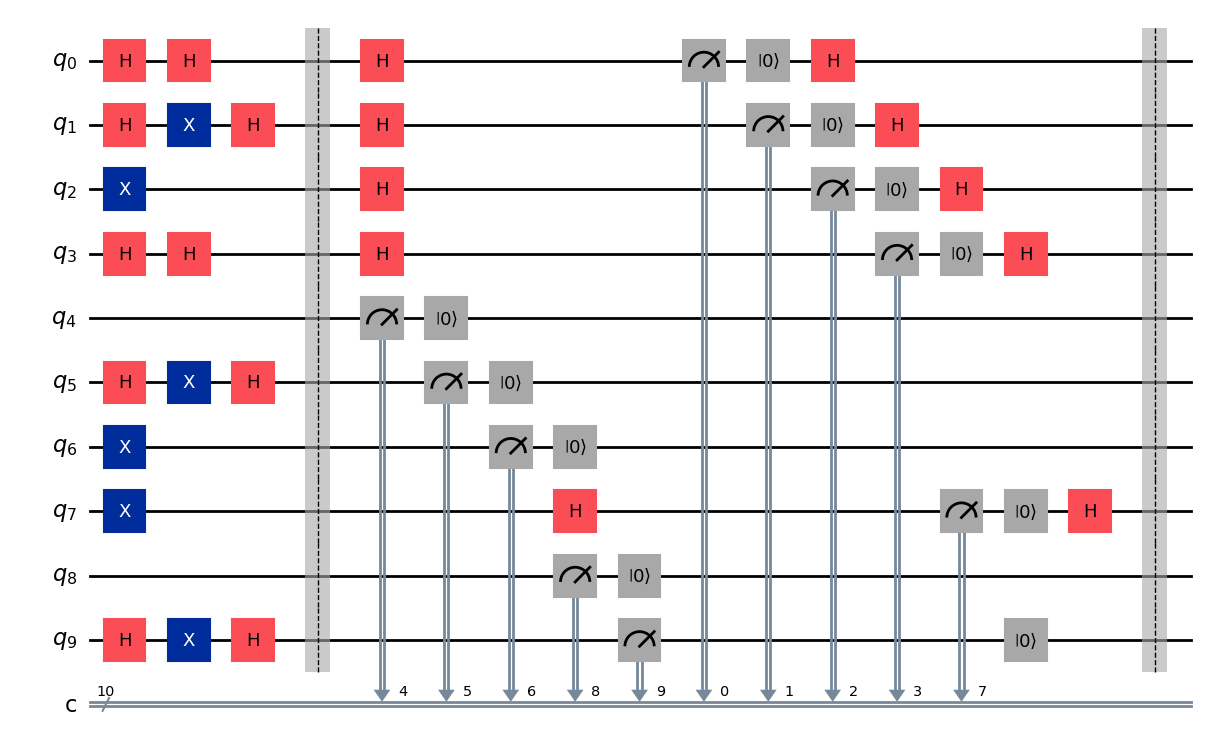

### Key Sifting Process

Sifted key: [0, 1, 1]


### Conclusion

Eavesdropping detected: True


In [31]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator, Aer
from IPython.display import display, Markdown

# Initialize the AerSimulator
simulator = AerSimulator()

def create_bb84_circuit(bits, bases):
    """Creates a BB84 encoded quantum circuit based on given bits and bases."""
    num_qubits = len(bits)
    qc = QuantumCircuit(num_qubits, num_qubits)
    for i in range(num_qubits):
        if bases[i] == 1:  # Apply Hadamard for diagonal basis
            qc.h(i)
        if bits[i] == 1:  # Apply X gate if bit is 1
            qc.x(i)
        if bases[i] == 1:  # Apply Hadamard again if in diagonal basis
            qc.h(i)
    qc.barrier()
    return qc, bits, bases

def visualize_qubit_creation(qc):
    """Visualize the qubit state just after creation."""
    display(Markdown("### Circuit Diagram Qubit state after creation"))
    state = Statevector.from_instruction(qc)
    plot_bloch_multivector(state, title="Qubit States After Creation")
    display(qc.draw(output='mpl'))

def measure_in_bases(qc, bases):
    """Measures the qubits in the circuit according to the specified bases."""
    for i, base in enumerate(bases):
        if base == 1:
            qc.h(i)
        qc.measure(i, i)

def eavesdrop(qc, num_qubits):
    """Simulates an eavesdropper measuring the quantum bits."""
    eve_bases = np.random.randint(2, size=num_qubits)
    for i, base in enumerate(eve_bases):
        if base == 1:
            qc.h(i)
        qc.measure(i, i)  # Eve's measurement
        qc.reset(i)  # Reset qubit after measurement
        if base == 1:
            qc.h(i)
    qc.barrier()
    return eve_bases

def visualize_eavesdropping(qc):
    """Visualize the circuit during eavesdropping."""
    display(Markdown("### Circuit Diagram with Eavesdropping"))
    display(qc.draw(output='mpl'))
   
    # Save the figure
    # Draw the circuit
    #fig = qc.draw(output='mpl')  # 'mpl' output uses matplotlib backend
    #fig.savefig('quantum_circuit.png')  # Saves the circuit as a PNG file
    #plt.close(fig)

def sift_and_visualize(bits, bases, bob_bases):
    """Sifts the key based on matching bases and visualizes before and after."""
    display(Markdown("### Key Sifting Process"))
    sifted_key = []
    for i in range(len(bases)):
        if bases[i] == bob_bases[i]:
            sifted_key.append(bits[i])
    print("Sifted key:", sifted_key)
    return sifted_key

# Simulation Setup
num_qubits = 10
alice_bits = np.random.randint(2, size=num_qubits)
alice_bases = np.random.randint(2, size=num_qubits)
bob_bases = np.random.randint(2, size=num_qubits)

# Create BB84 circuit and include eavesdropping
bb84_circ, bits, bases = create_bb84_circuit(alice_bits, alice_bases)
visualize_qubit_creation(bb84_circ)
eve_bases = eavesdrop(bb84_circ, num_qubits)
visualize_eavesdropping(bb84_circ)
measure_in_bases(bb84_circ, bob_bases)

# Simulate the circuit
compiled_circuit = transpile(bb84_circ, simulator)
job = simulator.run(compiled_circuit, shots=1)
result = job.result()
counts = result.get_counts(bb84_circ)

# Visualization and Analysis
plot_histogram(counts)
sifted_key = sift_and_visualize(bits, bases, bob_bases)

# Conclusion
display(Markdown("### Conclusion"))
print("Eavesdropping detected:", np.any(alice_bases != eve_bases))
